# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

In [67]:
import numpy as np
from scipy import optimize
import sympy as sm

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2


# Model description


### Solow Model with Human Capital: Key Equations

1. **Production Function:**
   The extended Cobb-Douglas production function including human capital is given by:
   $$
   Y_t = K_t^\alpha H_t^\phi (A_t L_t)^{1-\alpha-\phi}
   $$

2. **Capital Accumulation Equations:**
   - **Physical Capital:**
     $$
     K_{t+1} = s_K Y_t + (1 - \delta) K_t
     $$
   - **Human Capital:**
     $$
     H_{t+1} = s_H Y_t + (1 - \delta) H_t
     $$
   where s_K and s_H are the savings rates for physical and human capital, and delta is the common depreciation rate for both types of capital.

3. **Per Worker Terms:**
   Transforming these equations into per effective worker terms involves normalizing by the effective labor:
   - **Capital per effective worker:**
     $$
     \tilde{k}_{t+1} = \frac{s_K \tilde{y}_t + (1-\delta) \tilde{k}_t}{(1+n)(1+g)}
     $$
   - **Human capital per effective worker:**
     $$
     \tilde{h}_{t+1} = \frac{s_H \tilde{y}_t + (1-\delta) \tilde{h}_t}{(1+n)(1+g)}
     $$
   where n is the growth rate of labor and g is the growth rate of technology.

In [68]:
import sympy as sm

# Define the symbols
sK, sH, alpha, varphi, delta, k_tilde, h_tilde, n, g = sm.symbols('sK sH alpha varphi delta k_tilde h_tilde n g')

# Define the equations assuming steady state (k_tilde_{t+1} = k_tilde_t = k_tilde)
eq_k = sm.Eq(k_tilde, (sK * k_tilde**alpha * h_tilde**varphi + (1 - delta) * k_tilde) / ((1 + n) * (1 + g)))


steady_state_k = sm.solve(eq_k, k_tilde)[0]


steady_state_k

((delta + g*n + g + n)/(h_tilde**varphi*sK))**(1/(alpha - 1))

In [69]:
eq_h = sm.Eq(h_tilde, (sH * k_tilde**alpha * h_tilde**varphi + (1 - delta) * h_tilde) / ((1 + n) * (1 + g)))
steady_state_h = sm.solve(eq_h, h_tilde)[0]
steady_state_h

((delta + g*n + g + n)/(k_tilde**alpha*sH))**(1/(varphi - 1))

**Steady State for Capital and Human capital:**

We rewrite the two solutions for k_tilde and h_tilde and get the steady state value.

- **Capital per effective worker:**
  $$
  \tilde{k}^* = \left(\frac{s_K^{1-\phi} s_H^\phi}{n+g+\delta+n\delta}\right)^{\frac{1}{1-\alpha-\phi}}
  $$

- **Human capital per effective worker:**
  $$
  \tilde{h}^* = \left(\frac{s_K^\alpha s_H^{1-\alpha}}{n+g+\delta+n\delta}\right)^{\frac{1}{1-\alpha-\phi}}
  $$

**Steady state for output per effective worker:**

Then the steady state output per effective worker is given by the following equation:

$$
\tilde{y}^* = (\tilde{k}^*)^\alpha (\tilde{h}^*)^\phi
$$

Using the values for capital per effective worker and human capital per effective worker derived previously:

$$
\tilde{y}^* = \left( \left( \frac{s_K^{1-\phi} s_H^\phi}{n+g+\delta+n\delta} \right)^{\frac{\alpha}{1-\alpha-\phi}} \right) \left( \left( \frac{s_K^\alpha s_H^{1-\alpha}}{n+g+\delta+n\delta} \right)^{\frac{\phi}{1-\alpha-\phi}} \right)
$$

Expanding this, we get:

$$
\tilde{y}^* = \left( \frac{s_K}{n+g+\delta+n\delta} \right)^{\frac{\alpha}{1-\alpha-\phi}} \left( \frac{s_H}{n+g+\delta+n\delta} \right)^{\frac{\phi}{1-\alpha-\phi}}
$$

7. **Parameterestimates** 

We are using the estimates used in macro 1 lectures and simulation of the Solow model with Human capital, which is done by Casper Worm:

$$\alpha = 0.33 , \phi = 0.33, s_H = 0.2, s_K = 0.2, delta = 0.05, n = 0.025, g = 0.02

## Analytical solution

If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

In [70]:
import sympy as sm

# Define symbols
sK, sH, Y_tilde, delta, k_tilde, h_tilde, n, g = sm.symbols('sK sH Y_tilde delta k_tilde h_tilde n g')

# Define the equations for steady state
eq_k = sm.Eq(k_tilde, (sK * Y_tilde + (1 - delta) * k_tilde) / ((1 + n) * (1 + g)))
eq_h = sm.Eq(h_tilde, (sH * Y_tilde + (1 - delta) * h_tilde) / ((1 + n) * (1 + g)))

# Solve for k_tilde and h_tilde at steady state
steady_state_k = sm.solve(eq_k, k_tilde)[0]
steady_state_h = sm.solve(eq_h, h_tilde)[0]

print("Steady state for capital per effective worker:")
print(steady_state_k)

print("\nSteady state for human capital per effective worker:")
print(steady_state_h)

Steady state for capital per effective worker:
Y_tilde*sK/(delta + g*n + g + n)

Steady state for human capital per effective worker:
Y_tilde*sH/(delta + g*n + g + n)


Steady state, for Human capital, Capital akkumulation and output

In [71]:
import sympy as sp

# Define symbols
s_K, s_H, alpha, phi, n, g, delta = sp.symbols('s_K s_H alpha phi n g delta')

# Steady state equations
k_star = ((s_K**(1-phi) * s_H**phi) / (n + g + delta + n*g))**(1/(1-alpha-phi))
h_star = ((s_K**alpha * s_H**(1-alpha)) / (n + g + delta + n*g))**(1/(1-alpha-phi))
y_star = (s_K / (n + g + delta + n*g))**(alpha/(1-alpha-phi)) * \
         (s_H / (n + g + delta + n*g))**(phi/(1-alpha-phi))

# Lambdify the steady state functions
steady_state_k = sp.lambdify((s_K, s_H, alpha, phi, n, g, delta), k_star)
steady_state_h = sp.lambdify((s_K, s_H, alpha, phi, n, g, delta), h_star)
steady_state_y = sp.lambdify((s_K, s_H, alpha, phi, n, g, delta), y_star)

# Example usage:
# Suppose we want to evaluate steady-state values for specific parameter values
s_K_val = 0.2  # Savings rate for physical capital
s_H_val = 0.2  # Savings rate for human capital
alpha_val = 0.33
phi_val = 0.33
n_val = 0.025  # Labor force growth rate
g_val = 0.02  # Technology growth rate
delta_val = 0.05  # Depreciation rate

# Calculate steady-state values
k_star_val = steady_state_k(s_K_val, s_H_val, alpha_val, phi_val, n_val, g_val, delta_val)
h_star_val = steady_state_h(s_K_val, s_H_val, alpha_val, phi_val, n_val, g_val, delta_val)
y_star_val = steady_state_y(s_K_val, s_H_val, alpha_val, phi_val, n_val, g_val, delta_val)

# Print steady-state values
print("Steady-state capital (k*):", k_star_val)
print("Steady-state human capital (h*):", h_star_val)
print("Steady-state output per effective worker (y*):", y_star_val)






Steady-state capital (k*): 8.794192202818298
Steady-state human capital (h*): 8.794192202818298
Steady-state output per effective worker (y*): 4.199226776845735


## Numerical solution

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

Transitions diagrams

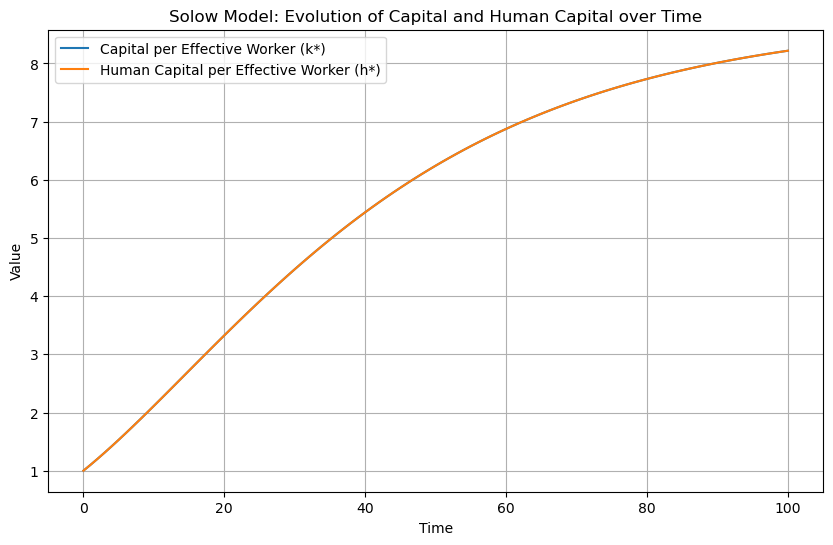

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Solow model transition equations
def solow_model_dynamics(k, h, s_K, s_H, alpha, phi, n, g, delta):
    k_next = (1 / ((1 + n) * (1 + g))) * (s_K * k**alpha * h**phi + (1 - delta) * k)
    h_next = (1 / ((1 + n) * (1 + g))) * (s_H * k**alpha * h**phi + (1 - delta) * h)
    return k_next, h_next

# Define parameter values
s_K = 0.2
s_H = 0.2
alpha = 0.33
phi = 0.33
n = 0.025
g = 0.02
delta = 0.05

# Initial conditions
k0 = 1.0  # Initial capital per effective worker
h0 = 1.0  # Initial human capital per effective worker

# Time points for integration (0 to 100 time units)
t = np.arange(0, 101)  # Time grid

# Simulate the dynamics of capital and human capital over time
k_sol = np.zeros(len(t))
h_sol = np.zeros(len(t))
k_sol[0] = k0
h_sol[0] = h0

for i in range(1, len(t)):
    k_sol[i], h_sol[i] = solow_model_dynamics(k_sol[i-1], h_sol[i-1], s_K, s_H, alpha, phi, n, g, delta)

# Plot the evolution of capital and human capital over time
plt.figure(figsize=(10, 6))
plt.plot(t, k_sol, label='Capital per Effective Worker (k*)')
plt.plot(t, h_sol, label='Human Capital per Effective Worker (h*)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Solow Model: Evolution of Capital and Human Capital over Time')
plt.legend()
plt.grid(True)
plt.show()




Fasediagram - both equal to H and rewriting. The equations is:

Skriv fasediagrams ligninger her

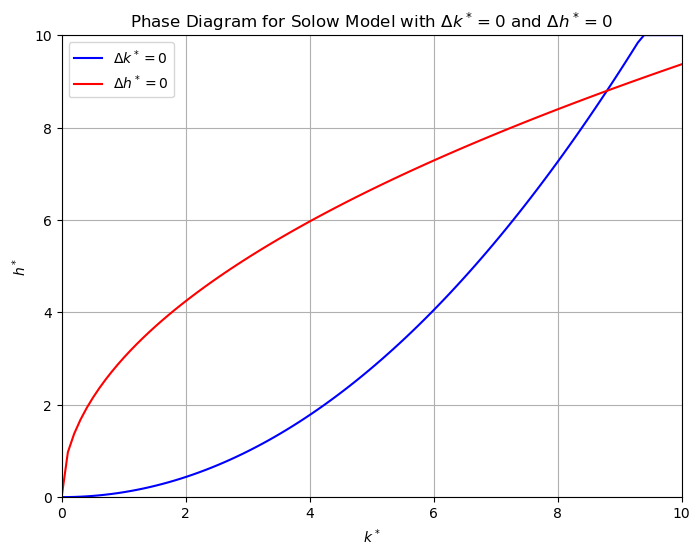

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# Define functions for steady-state h* when Δk* = 0 and Δh* = 0
def h_steady_state_delta_k_zero(k, s_K, n, g, delta, alpha, phi):
    return np.minimum(((n + g + delta + n*g) / s_K)**(1 / phi) * k**((1 - alpha) / phi), 10)

def h_steady_state_delta_h_zero(k, s_H, n, g, delta, alpha, phi):
    return np.minimum((s_H / (n + g + delta + n*g))**(1 / (1 - phi)) * k**(alpha / (1 - phi)), 10)

# Range of k* values (include 0 for starting point)
k_values = np.linspace(0, 10, 100)  # Adjust the range as needed

# Parameters
s_K = 0.2
s_H = 0.2
alpha = 0.33
phi = 0.33
n = 0.025
g = 0.02
delta = 0.05

# Calculate corresponding h* values for Δk* = 0 and Δh* = 0
h_delta_k_zero = h_steady_state_delta_k_zero(k_values, s_K, n, g, delta, alpha, phi)
h_delta_h_zero = h_steady_state_delta_h_zero(k_values, s_H, n, g, delta, alpha, phi)

# Plot the phase diagram
plt.figure(figsize=(8, 6))
plt.plot(k_values, h_delta_k_zero, label=r'$\Delta k^* = 0$', color='blue')
plt.plot(k_values, h_delta_h_zero, label=r'$\Delta h^* = 0$', color='red')
plt.xlabel(r'$k^*$')
plt.ylabel(r'$h^*$')
plt.ylim(0, 10)  # Set the y-axis limits to 0 and 10
plt.xlim(0, 10)  # Set the x-axis limits to 0 and 10
plt.title('Phase Diagram for Solow Model with $\Delta k^* = 0$ and $\Delta h^* = 0$')
plt.legend()
plt.grid(True)
plt.show()



# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

Changes of parameter values - sensitivity analysis

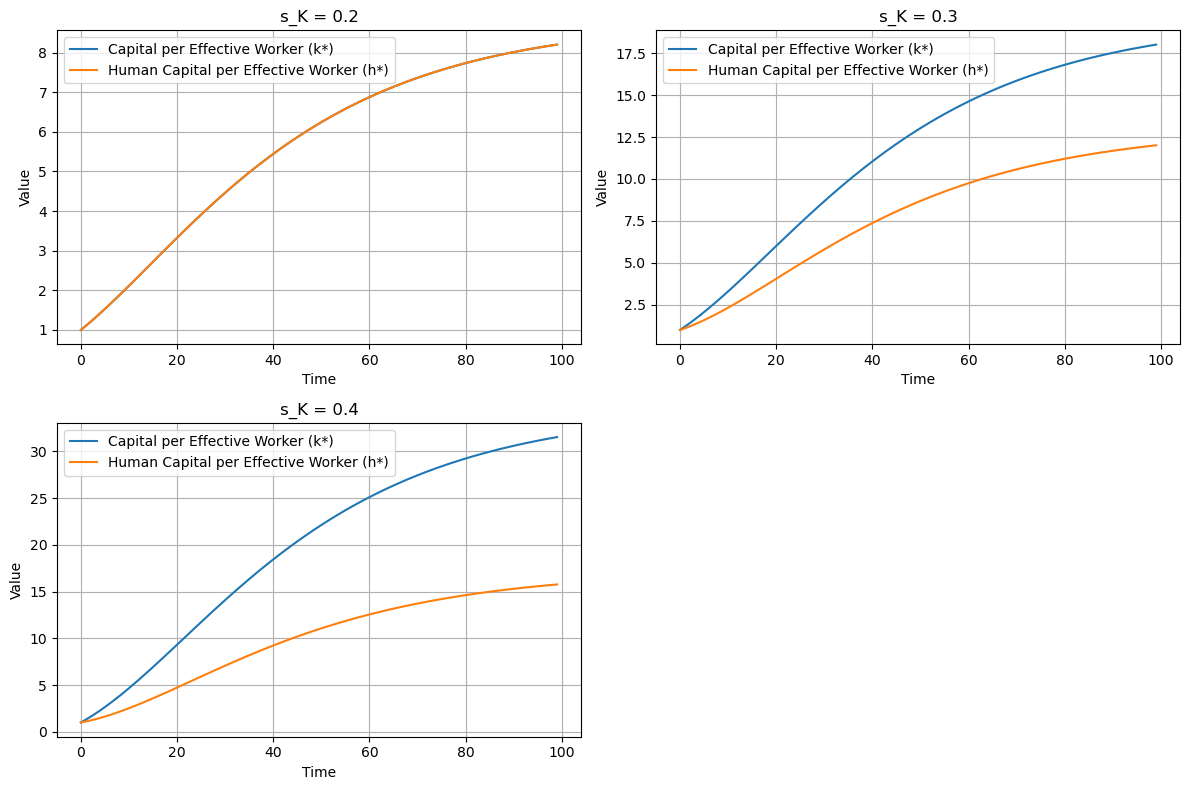

In [74]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Solow model transition equations
def solow_model_dynamics(k, h, s_K, s_H, alpha, phi, n, g, delta):
    k_next = (1 / ((1 + n) * (1 + g))) * (s_K * k**alpha * h**phi + (1 - delta) * k)
    h_next = (1 / ((1 + n) * (1 + g))) * (s_H * k**alpha * h**phi + (1 - delta) * h)
    return k_next, h_next

# Function to simulate Solow model dynamics over time
def simulate_solow_model(k0, h0, s_K, s_H, alpha, phi, n, g, delta, T):
    k_values = np.zeros(T)
    h_values = np.zeros(T)
    k_values[0] = k0
    h_values[0] = h0
    
    for t in range(1, T):
        k_next, h_next = solow_model_dynamics(k_values[t-1], h_values[t-1], s_K, s_H, alpha, phi, n, g, delta)
        k_values[t] = k_next
        h_values[t] = h_next
    
    return k_values, h_values

# Function to plot transitions over time
def plot_transitions_over_time(parameter_values, parameter_name, k0, h0, s_K, s_H, alpha, phi, n, g, delta, T):
    num_params = len(parameter_values)
    num_cols = 2
    num_rows = int(np.ceil(num_params / num_cols))
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows))
    axes = axes.flatten()
    
    for i, param_value in enumerate(parameter_values):
        if parameter_name == 's_K':
            s_K = param_value
        elif parameter_name == 's_H':
            s_H = param_value
        elif parameter_name == 'alpha':
            alpha = param_value
        elif parameter_name == 'phi':
            phi = param_value
        elif parameter_name == 'n':
            n = param_value
        elif parameter_name == 'g':
            g = param_value
        elif parameter_name == 'delta':
            delta = param_value
        
        k_values, h_values = simulate_solow_model(k0, h0, s_K, s_H, alpha, phi, n, g, delta, T)
        
        ax = axes[i]
        ax.plot(k_values, label='Capital per Effective Worker (k*)')
        ax.plot(h_values, label='Human Capital per Effective Worker (h*)')
        ax.set_title(f'{parameter_name} = {param_value}')
        ax.set_xlabel('Time')
        ax.set_ylabel('Value')
        ax.legend()
        ax.grid(True)
    
    if num_params % 2 != 0:
        fig.delaxes(axes[num_params])  # Remove unused subplot
    
    plt.tight_layout()
    plt.show()

# Define parameter values for sensitivity analysis
parameter_values = [0.2, 0.3, 0.4]  # Example parameter values to vary
parameter_name = 's_K'  # Parameter to vary (e.g., 's_K', 's_H', 'alpha', 'phi', 'n', 'g', 'delta')
k0 = 1.0  # Initial capital per effective worker
h0 = 1.0  # Initial human capital per effective worker
T = 100  # Number of time steps

# Perform sensitivity analysis and plot transitions over time
plot_transitions_over_time(parameter_values, parameter_name, k0, h0, 0.2, 0.2, 0.33, 0.33, 0.025, 0.02, 0.05, T)




Shock for the economy

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Define modified functions for unbounded growth
def h_steady_state_delta_k_zero(k, s_K, n, g, delta, alpha, phi):
    return ((n + g + delta + n*g) / s_K)**(1 / phi) * k**((1 - alpha) / phi)

def h_steady_state_delta_h_zero(k, s_H, n, g, delta, alpha, phi):
    return (s_H / (n + g + delta + n*g))**(1 / (1 - phi)) * k**(alpha / (1 - phi))

# Function to plot the phase diagram based on s_K and s_H values
def plot_phase_diagram(s_K, s_H):
    k_values = np.linspace(0, 100, 500)  # Extend range of k_values for unbounded growth

    alpha = 0.33
    phi = 0.33
    n = 0.025
    g = 0.02
    delta = 0.05

    h_delta_k_zero = h_steady_state_delta_k_zero(k_values, s_K, n, g, delta, alpha, phi)
    h_delta_h_zero = h_steady_state_delta_h_zero(k_values, s_H, n, g, delta, alpha, phi)

    plt.figure(figsize=(10, 8))
    plt.plot(k_values, h_delta_k_zero, label=r'$\Delta k^* = 0$', color='blue')
    plt.plot(k_values, h_delta_h_zero, label=r'$\Delta h^* = 0$', color='red')
    plt.xlabel(r'$k^*$')
    plt.ylabel(r'$h^*$')
    plt.ylim(0, 25)  # Set the y-axis limits to 0 and 10
    plt.xlim(0, 25)  # Set the x-axis limits to 0 and 10
    plt.title('Phase Diagram for Solow Model with $\Delta k^* = 0$ and $\Delta h^* = 0$')
    plt.legend()
    plt.grid(True)
    plt.show()

# Create interactive sliders for s_K and s_H
interact(plot_phase_diagram,
         s_K=FloatSlider(min=0.1, max=1.0, step=0.01, value=0.2, description='s_K'),
         s_H=FloatSlider(min=0.1, max=1.0, step=0.01, value=0.2, description='s_H'))


interactive(children=(FloatSlider(value=0.2, description='s_K', max=1.0, min=0.1, step=0.01), FloatSlider(valu…

<function __main__.plot_phase_diagram(s_K, s_H)>

Extension - Humancapital with tax

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Define symbols
s_K, s_H, alpha, phi, n, g, delta, tau_K, tau_H = sp.symbols('s_K s_H alpha phi n g delta tau_K tau_H')

# Define adjusted savings rates considering taxes
effective_s_K = s_K * (1 - tau_K)
effective_s_H = s_H * (1 - tau_H)

# Steady state equations considering taxes
k_star = ((effective_s_K**(1-phi) * effective_s_H**phi) / (n + g + delta + n*g))**(1/(1-alpha-phi))
h_star = ((effective_s_K**alpha * effective_s_H**(1-alpha)) / (n + g + delta + n*g))**(1/(1-alpha-phi))
y_star = (effective_s_K / (n + g + delta + n*g))**(alpha/(1-alpha-phi)) * \
         (effective_s_H / (n + g + delta + n*g))**(phi/(1-alpha-phi))

# Lambdify the steady state functions
steady_state_k = sp.lambdify((s_K, s_H, alpha, phi, n, g, delta, tau_K, tau_H), k_star)
steady_state_h = sp.lambdify((s_K, s_H, alpha, phi, n, g, delta, tau_K, tau_H), h_star)
steady_state_y = sp.lambdify((s_K, s_H, alpha, phi, n, g, delta, tau_K, tau_H), y_star)

# Define parameter values including taxes
tau_K_val = 0.1  # Tax rate on capital income
tau_H_val = 0.1  # Tax rate on human capital income

# Calculate steady-state values with taxes
k_star_val = steady_state_k(0.2, 0.2, 0.33, 0.33, 0.025, 0.02, 0.05, tau_K_val, tau_H_val)
h_star_val = steady_state_h(0.2, 0.2, 0.33, 0.33, 0.025, 0.02, 0.05, tau_K_val, tau_H_val)
y_star_val = steady_state_y(0.2, 0.2, 0.33, 0.33, 0.025, 0.02, 0.05, tau_K_val, tau_H_val)

# Print steady-state values with taxes
print("Steady-state capital (k*) with taxes:", k_star_val)
print("Steady-state human capital (h*) with taxes:", h_star_val)
print("Steady-state output per effective worker (y*) with taxes:", y_star_val)


Steady-state capital (k*) with taxes: 6.450822596836995
Steady-state human capital (h*) with taxes: 6.450822596836995
Steady-state output per effective worker (y*) with taxes: 3.4225197666551823


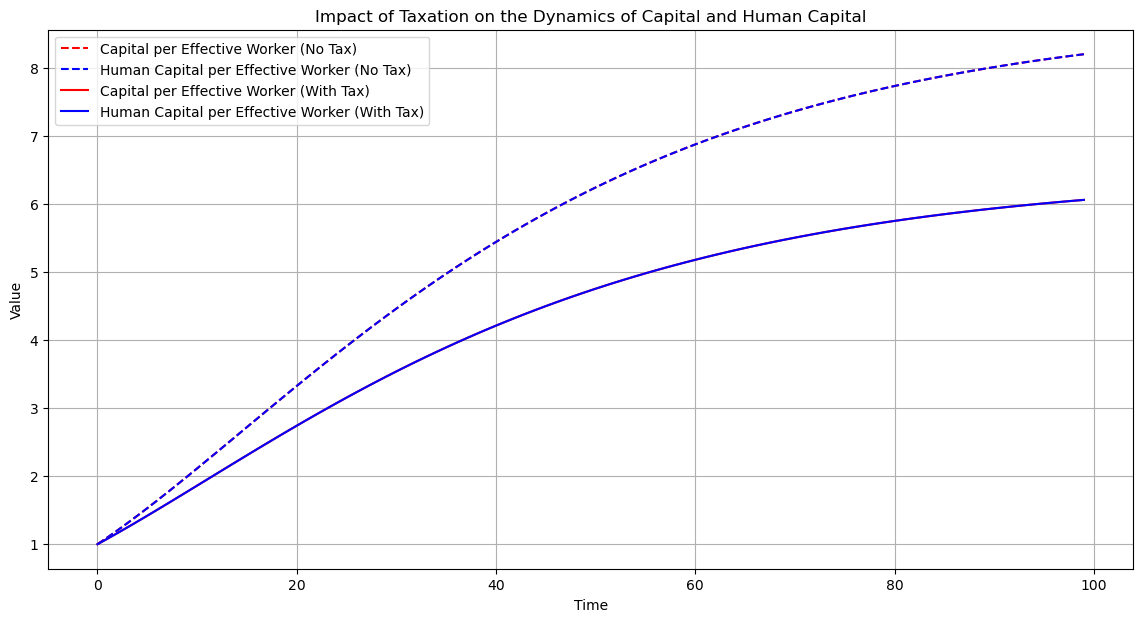

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate Solow model dynamics over time
def solow_model_dynamics(k, h, s_K, s_H, alpha, phi, n, g, delta, tau_K=0, tau_H=0):
    effective_s_K = s_K * (1 - tau_K)  # Adjust saving rates for tax on capital
    effective_s_H = s_H * (1 - tau_H)  # Adjust saving rates for tax on human capital
    k_next = (1 / ((1 + n) * (1 + g))) * (effective_s_K * k**alpha * h**phi + (1 - delta) * k)
    h_next = (1 / ((1 + n) * (1 + g))) * (effective_s_H * k**alpha * h**phi + (1 - delta) * h)
    return k_next, h_next

# Simulation function
def simulate_solow_model(k0, h0, s_K, s_H, alpha, phi, n, g, delta, T, tau_K=0, tau_H=0):
    k_values = np.zeros(T)
    h_values = np.zeros(T)
    k_values[0] = k0
    h_values[0] = h0
    
    for t in range(1, T):
        k_values[t], h_values[t] = solow_model_dynamics(k_values[t-1], h_values[t-1], s_K, s_H, alpha, phi, n, g, delta, tau_K, tau_H)
    
    return k_values, h_values

# Parameters
s_K = 0.2
s_H = 0.2
alpha = 0.33
phi = 0.33
n = 0.025
g = 0.02
delta = 0.05
T = 100
k0 = 1.0
h0 = 1.0

# Tax rates
tau_K = 0.1  # Tax rate on capital income
tau_H = 0.1  # Tax rate on human capital income

# Simulate without tax
k_values_no_tax, h_values_no_tax = simulate_solow_model(k0, h0, s_K, s_H, alpha, phi, n, g, delta, T)

# Simulate with tax
k_values_with_tax, h_values_with_tax = simulate_solow_model(k0, h0, s_K, s_H, alpha, phi, n, g, delta, T, tau_K, tau_H)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(k_values_no_tax, label='Capital per Effective Worker (No Tax)', color='red', linestyle='--')
plt.plot(h_values_no_tax, label='Human Capital per Effective Worker (No Tax)', color='blue', linestyle='--')
plt.plot(k_values_with_tax, label='Capital per Effective Worker (With Tax)', color='red')
plt.plot(h_values_with_tax, label='Human Capital per Effective Worker (With Tax)', color='blue')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Impact of Taxation on the Dynamics of Capital and Human Capital')
plt.legend()
plt.grid(True)
plt.show()


# Conclusion

Add concise conclusion. 